In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# importing the libraries for logistic regression analysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [173]:
# Reading the data file only with the provided fields for the regression analysis as done by authors

fields = ["warstds", "ager", "agexp", "anoc", "army85", "autch98", "auto4",
    "autonomy", "avgnabo", "centpol3", "coldwar", "decade1", "decade2",
    "decade3", "decade4", "dem", "dem4", "demch98", "dlang", "drel", "durable",
    "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590", "expgdp", "exrec",
    "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2", "geo34", "geo57",
    "geo69", "geo8", "illiteracy", "incumb", "infant", "inst", "inst3", "life",
    "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper", "mirps0",
    "mirps1", "mirps2", "mirps3", "nat_war", "ncontig", "nmgdp", "nmdp4_alt",
    "numlang", "nwstate", "oil", "p4mchg", "parcomp", "parreg", "part",
    "partfree", "plural", "plurrel", "pol4", "pol4m", "pol4sq", "polch98",
    "polcomp", "popdense", "presi", "pri", "proxregc", "ptime", "reg",
    "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", "sxpnew",
    "sxpsq", "tnatwar", "trade", "warhist", "xconst"]

# Specifying the data folder and reading the corresponding csv file only with the fields mentioned above through the pandas library
data_folder = ''
df = pd.read_csv(data_folder + 'SambnisImp.csv', usecols=fields)
df_2 = pd.read_csv(data_folder + 'Amelia.Imp3.csv')


In [126]:
# Variables for the model by Fearon and Laitin where they use the below feature vectors for prediction of onset of a civil war
variables = ["ln_gdpen", "lpopns", "lmtnest",
    "ncontig", "oil", "nwstate", "inst3", "pol4", "ef", "relfrac"]

# Variables for the model by Collier and Hoeffler where they use the below feature vectors for prediction of onset of a civil war
variables_collier = ["sxpnew", "sxpsq", "ln_gdpen", "gdpgrowth",
    "warhist", "lmtnest", "ef", "popdense", "lpopns", "coldwar", "seceduc",
    "ptime"]

# Variables for the model by Hegre and Sambanis where they use the below feature vectors for prediction of onset of a civil war
variables_hegre = ["lpopns", "ln_gdpen", "inst3", "parreg", "geo34",
    "proxregc", "gdpgrowth", "anoc", "partfree", "nat_war", "lmtnest",
    "decade1", "pol4sq", "nwstate", "regd4_alt", "etdo4590", "milper", "geo1",
    "tnatwar", "presi"]


In [127]:
df.head()

,warstds,ptime,autonomy,popdense,army85,milper,trade,nmgdp,autch98,demch98,...,mirps1,mirps2,mirps3,sxpsq,pol4sq,decade1,decade2,decade3,decade4,proxregc
0,0,12,0.005151,118.554791,129472.9042,121.087366,72.881375,4508.131692,0,0,...,0.16935,0.313143,0.373714,0.052989,61.493014,0,0,0,0,0.143299
1,0,24,0.000000,117.756342,129413.0225,121.885359,72.900089,4491.340308,0,0,...,0.00000,1.000000,0.000000,0.052663,100.000000,0,0,0,0,1.000000
2,0,36,0.000000,118.280656,130431.0145,122.780608,72.962880,4484.267686,0,0,...,0.00000,1.000000,0.000000,0.052891,100.000000,0,0,0,0,1.000000
3,0,48,0.000000,118.325869,126781.6866,118.256427,73.102449,4474.082672,0,0,...,0.00000,1.000000,0.000000,0.052902,100.000000,0,0,0,0,1.000000
4,0,60,0.000000,118.312296,130979.2470,122.245074,72.850389,4497.299503,0,0,...,0.00000,1.000000,0.000000,0.052706,100.000000,0,0,0,0,1.000000


In [17]:
np.shape(fields)

(91,)

A total of 91 fields were read from the databse for the analysis

In [128]:
# Defining the corresponding output values and feature vectors for training the different models. The output vector is 
# similar for each model while the feature vectors are different.
# The output binary variable signalling the onset of civil war. 1 corresponds to a recorded civil war while 0 corresponds to otherwise
y = df['warstds'] 

# All the variables can be used for training except the target variable which is warstds
X = df.drop(['warstds'], axis=1)

# Feature vectors for the model by Fearon and laitin (2003)
X1 = df[variables]

# Feature vectors for the model by Collier and Hoeffler (2004)
X2 = df[variables_collier]

## Feature vectors for the model by Hegre and Sambanis (2006)
X3= df[variables_hegre]

In [129]:
X.head()

,ptime,autonomy,popdense,army85,milper,trade,nmgdp,autch98,demch98,polch98,...,mirps1,mirps2,mirps3,sxpsq,pol4sq,decade1,decade2,decade3,decade4,proxregc
0,12,0.005151,118.554791,129472.9042,121.087366,72.881375,4508.131692,0,0,0,...,0.16935,0.313143,0.373714,0.052989,61.493014,0,0,0,0,0.143299
1,24,0.000000,117.756342,129413.0225,121.885359,72.900089,4491.340308,0,0,0,...,0.00000,1.000000,0.000000,0.052663,100.000000,0,0,0,0,1.000000
2,36,0.000000,118.280656,130431.0145,122.780608,72.962880,4484.267686,0,0,0,...,0.00000,1.000000,0.000000,0.052891,100.000000,0,0,0,0,1.000000
3,48,0.000000,118.325869,126781.6866,118.256427,73.102449,4474.082672,0,0,0,...,0.00000,1.000000,0.000000,0.052902,100.000000,0,0,0,0,1.000000
4,60,0.000000,118.312296,130979.2470,122.245074,72.850389,4497.299503,0,0,0,...,0.00000,1.000000,0.000000,0.052706,100.000000,0,0,0,0,1.000000


In [130]:
# Evaluating all the columns which are continuous so that they can be normalised. A feature is considered continuous if it has 
#more than 5 unique entries

continuous =[]
for j in fields:
    if (df[j].nunique())>5:
        continuous.append(str(j))
    else:
        continue
   

In [131]:
np.shape(continuous)

(74,)

There are a total of 74 continuous features out of 91 total fields and rest 17 are categorical variables

In [133]:
# Standardising all the continuous features for better scaling of variables

for j in continuous:
    X[j] = (X[j] - X[j].mean())/X[j].std()

Fitting a SVM to the dataset for predicting the onset of civil war. Instead of binary prediction, we will fit a SVM which outputs the 
probability of belonging to a class so that we can plot a ROC curve by varying the threshold probability and obtain the respective AUC. 

In [165]:
from sklearn import svm
# fitting a svm model with default parameters
model_Svm = svm.SVC(probability = True, gamma = 'scale')


In [166]:
model_Svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [167]:
# Training the model by cross validation. Employing cross validation is preferable to just training on the whole
# dataset and predicting on the same dataset as the latter approach entails overfitting. 

# Predict the probabilities with a cross validation
y_pred3 = cross_val_predict(model_Svm, X, y, cv=5,method='predict_proba')
# Compute the False Positive Rate and True Positive Rate
fpr3, tpr3, _ = roc_curve(y, y_pred3[:,1])
# Compute the area under the fpr-tpr curve
auc_score3 = auc(fpr3, tpr3)

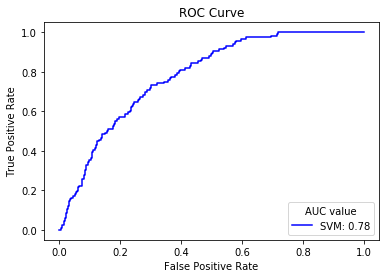

In [168]:
plt.plot(fpr3, tpr3, 'b', label ="SVM: " + str(round(auc_score3,2)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");
plt.legend(loc="lower right",title="AUC value")
plt.show()

We will try to use a neural network to classify the dataset according to the variables. As neural networks have been shown to have a higher accuracy than the traditional methods, it is expected that this should lead to a better AUC

In [140]:
from sklearn.neural_network import MLPClassifier

In [149]:
mlp = MLPClassifier()



In [150]:
# Training the model by cross validation. Employing cross validation is preferable to just training on the whole
# dataset and predicting on the same dataset as the latter approach entails overfitting. 

# Predict the probabilities with a cross validation
y_pred2 = cross_val_predict(mlp, X, y, cv=5, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr2, tpr2, _ = roc_curve(y, y_pred2[:, 1])
# Compute the area under the fpr-tpr curve
auc_score2 = auc(fpr2, tpr2)

C:\Users\Anshul Toshniwal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anshul Toshniwal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


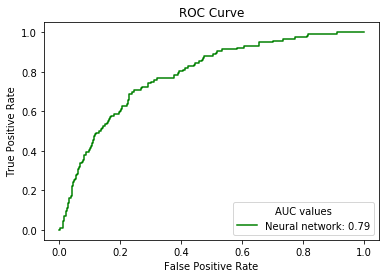

In [151]:
plt.plot(fpr2, tpr2, 'g', label ="Neural network: " + str(round(auc_score2,2)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");
plt.legend(loc="lower right",title="AUC values")
plt.show()

We also try to implement the simplest method of classification, bayes classifier, to benchmark the accuracy of other methods

In [152]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()

In [169]:
model_naive

GaussianNB(priors=None, var_smoothing=1e-09)

In [153]:
# Training the model by Fearon and laitin by cross validation. Employing cross validation is preferable to just training on the whole
# dataset and predicting on the same dataset as the latter approach entails overfitting. 

# Predict the probabilities with a cross validation
y_pred = cross_val_predict(model_naive, X, y, cv=5, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr1, tpr1, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpr-tpr curve
auc_score = auc(fpr1, tpr1)

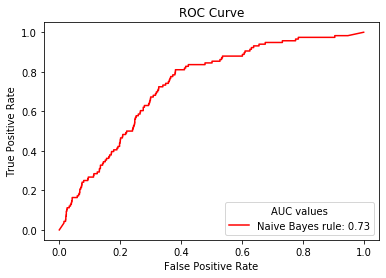

In [154]:
plt.plot(fpr1, tpr1, 'r', label ="Naive Bayes rule: " + str(round(auc_score,2)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");
plt.legend(loc="lower right",title="AUC values")
plt.show()